# Data Preprocessing for predicting Transcription Rate (TS)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import pelkmans.mpp_data

Setting BASE_DIR to /home/hhughes/Documents/Master_Thesis/Project


Load raw data:

In [2]:
# Set paths
BASE_DIR = os.path.realpath(os.path.join(os.path.abspath(''),'../'))
if not os.path.exists(BASE_DIR):
    print('ERROR!, base path {} does not exist! Setting to None'.format(BASE_DIR))
    BASE_DIR = None

DATA_DIR = os.path.join(BASE_DIR, 'datasets', 'raw')
if not os.path.exists(DATA_DIR):
    print('ERROR!, data path {} does not exist! Setting to None'.format(DATA_DIR))
    DATA_DIR = None

# List available local Wells
wells = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print('Available local wells: \n', wells)

Available local wells: 
 ['I11', 'I09', 'J10']


In [3]:
# In case you only want to load some specific wells, rename 'wells'
wells = ['J10']

In [4]:
for well in wells:
    print(well)

J10


In [5]:
data_dirs = [os.path.join(DATA_DIR, well) for well in wells]
dir_type = 'hannah'
seed = 123

In [6]:

mpp_data = pelkmans.mpp_data.MPPData.from_data_dir(data_dirs[0], 
                                                   dir_type=dir_type, 
                                                   seed=seed)

In [7]:
background_values = os.path.join(DATA_DIR, 'secondary_only_relative_normalisation.csv')
mpp_data.subtract_background(background_values)

missing background value for channels ['00_EU', '09_SRRM2_ILASTIK', '15_SON_ILASTIK']


In [8]:
train_frac = 0.8
val_frac = 0.1
train, val, test = mpp_data.train_val_test_split(train_frac, val_frac)


In [10]:
train = [train]
train

In [17]:
dir(train)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_per_mpp_value',
 'add_conditions',
 'add_mcu',
 'add_neighborhood',
 'center_mpp',
 'channels',
 'concat',
 'conditions',
 'from_data_dir',
 'get_condition_img',
 'get_img_from_data',
 'get_mcu_img',
 'get_mpp_img',
 'get_neighborhood',
 'get_object_imgs',
 'has_neighbor_data',
 'labels',
 'log',
 'mapobject_ids',
 'mcu_ids',
 'metadata',
 'mpp',
 'rescale_intensities_per_channel',
 'seed',
 'subsample',
 'subset_channels',
 'subtract_background',
 'train_val_test_split',
 'x',
 'y']

In [24]:
train.metadata

mapobject_id plate_name well_name  well_pos_y  well_pos_x  tpoint  \
0          279425    plate01       J10           0           0       0   
1          279426    plate01       J10           0           0       0   
2          279427    plate01       J10           0           0       0   
3          279428    plate01       J10           0           0       0   
4          279430    plate01       J10           0           0       0   
..            ...        ...       ...         ...         ...     ...   
859        361987    plate01       J10           5           4       0   
860        361988    plate01       J10           5           4       0   
861        361990    plate01       J10           5           4       0   
862        361991    plate01       J10           5           4       0   
863        361993    plate01       J10           5           4       0   

     zplane  label  is_border  mapobject_id_cell  ... tpoint_cell zplane_cell  \
0         0      1          0             279369  ...           0           0   
1         0      2          0             279370  ...           0           0   
2         0      3          0             279371  ...           0           0   
3         0      4          0             279372  ...           0           0   
4         0      6          0             279374  ...           0           0   
..      ...    ...        ...                ...  ...         ...         ...   
859       0     63          0             361853  ...           0           0   
860       0     64          0             361854  ...           0           0   
861       0     66          0             361856  ...           0           0   
862       0     67          0             361857  ...           0           0   
863       0     69          0             361859  ...           0           0   

     label_cell  is_border_cell  is_mitotic  is_mitotic_labels  \
0             1               1         0.0                NaN   
1             2               1         0.0                NaN   
2             3               1         1.0                NaN   
3             4               1         0.0                NaN   
4             6               0         0.0                NaN   
..          ...             ...         ...                ...   
859          63               0         0.0                NaN   
860          64               0         0.0                NaN   
861          66               1         0.0                NaN   
862          67               0         1.0                NaN   
863          69               1         1.0                NaN   

     is_polynuclei_HeLa  is_polynuclei_HeLa_labels  is_polynuclei_184A1  \
0                   0.0                        NaN                  0.0   
1                   0.0                        NaN                  0.0   
2                   1.0                        NaN                  0.0   
3                   0.0                        NaN                  0.0   
4                   0.0                        NaN                  0.0   
..                  ...                        ...                  ...   
859                 0.0                        NaN                  0.0   
860                 0.0                        NaN                  0.0   
861                 0.0                        NaN                  0.0   
862                 0.0                        NaN                  0.0   
863                 1.0                        NaN                  0.0   

     is_polynuclei_184A1_labels  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
..                          ...  
859                         NaN  
860                         NaN  
861                         NaN  
862                         NaN  
863                         NaN  

[864 rows x 24 columns]

In [11]:
train = mpp_data.concat(train)

In [12]:
percentile = 98.0

rescale_values = train.rescale_intensities_per_channel(percentile=percentile)
#_ = val.rescale_intensities_per_channel(rescale_values=rescale_values)
#_ = test.rescale_intensities_per_channel(rescale_values=rescale_values)

In [13]:
train_dataset = np.array(train.get_object_imgs(data='MPP', img_size=224))

In [14]:
train_dataset.shape

(864, 224, 224, 38)

<function matplotlib.pyplot.show(close=None, block=None)>

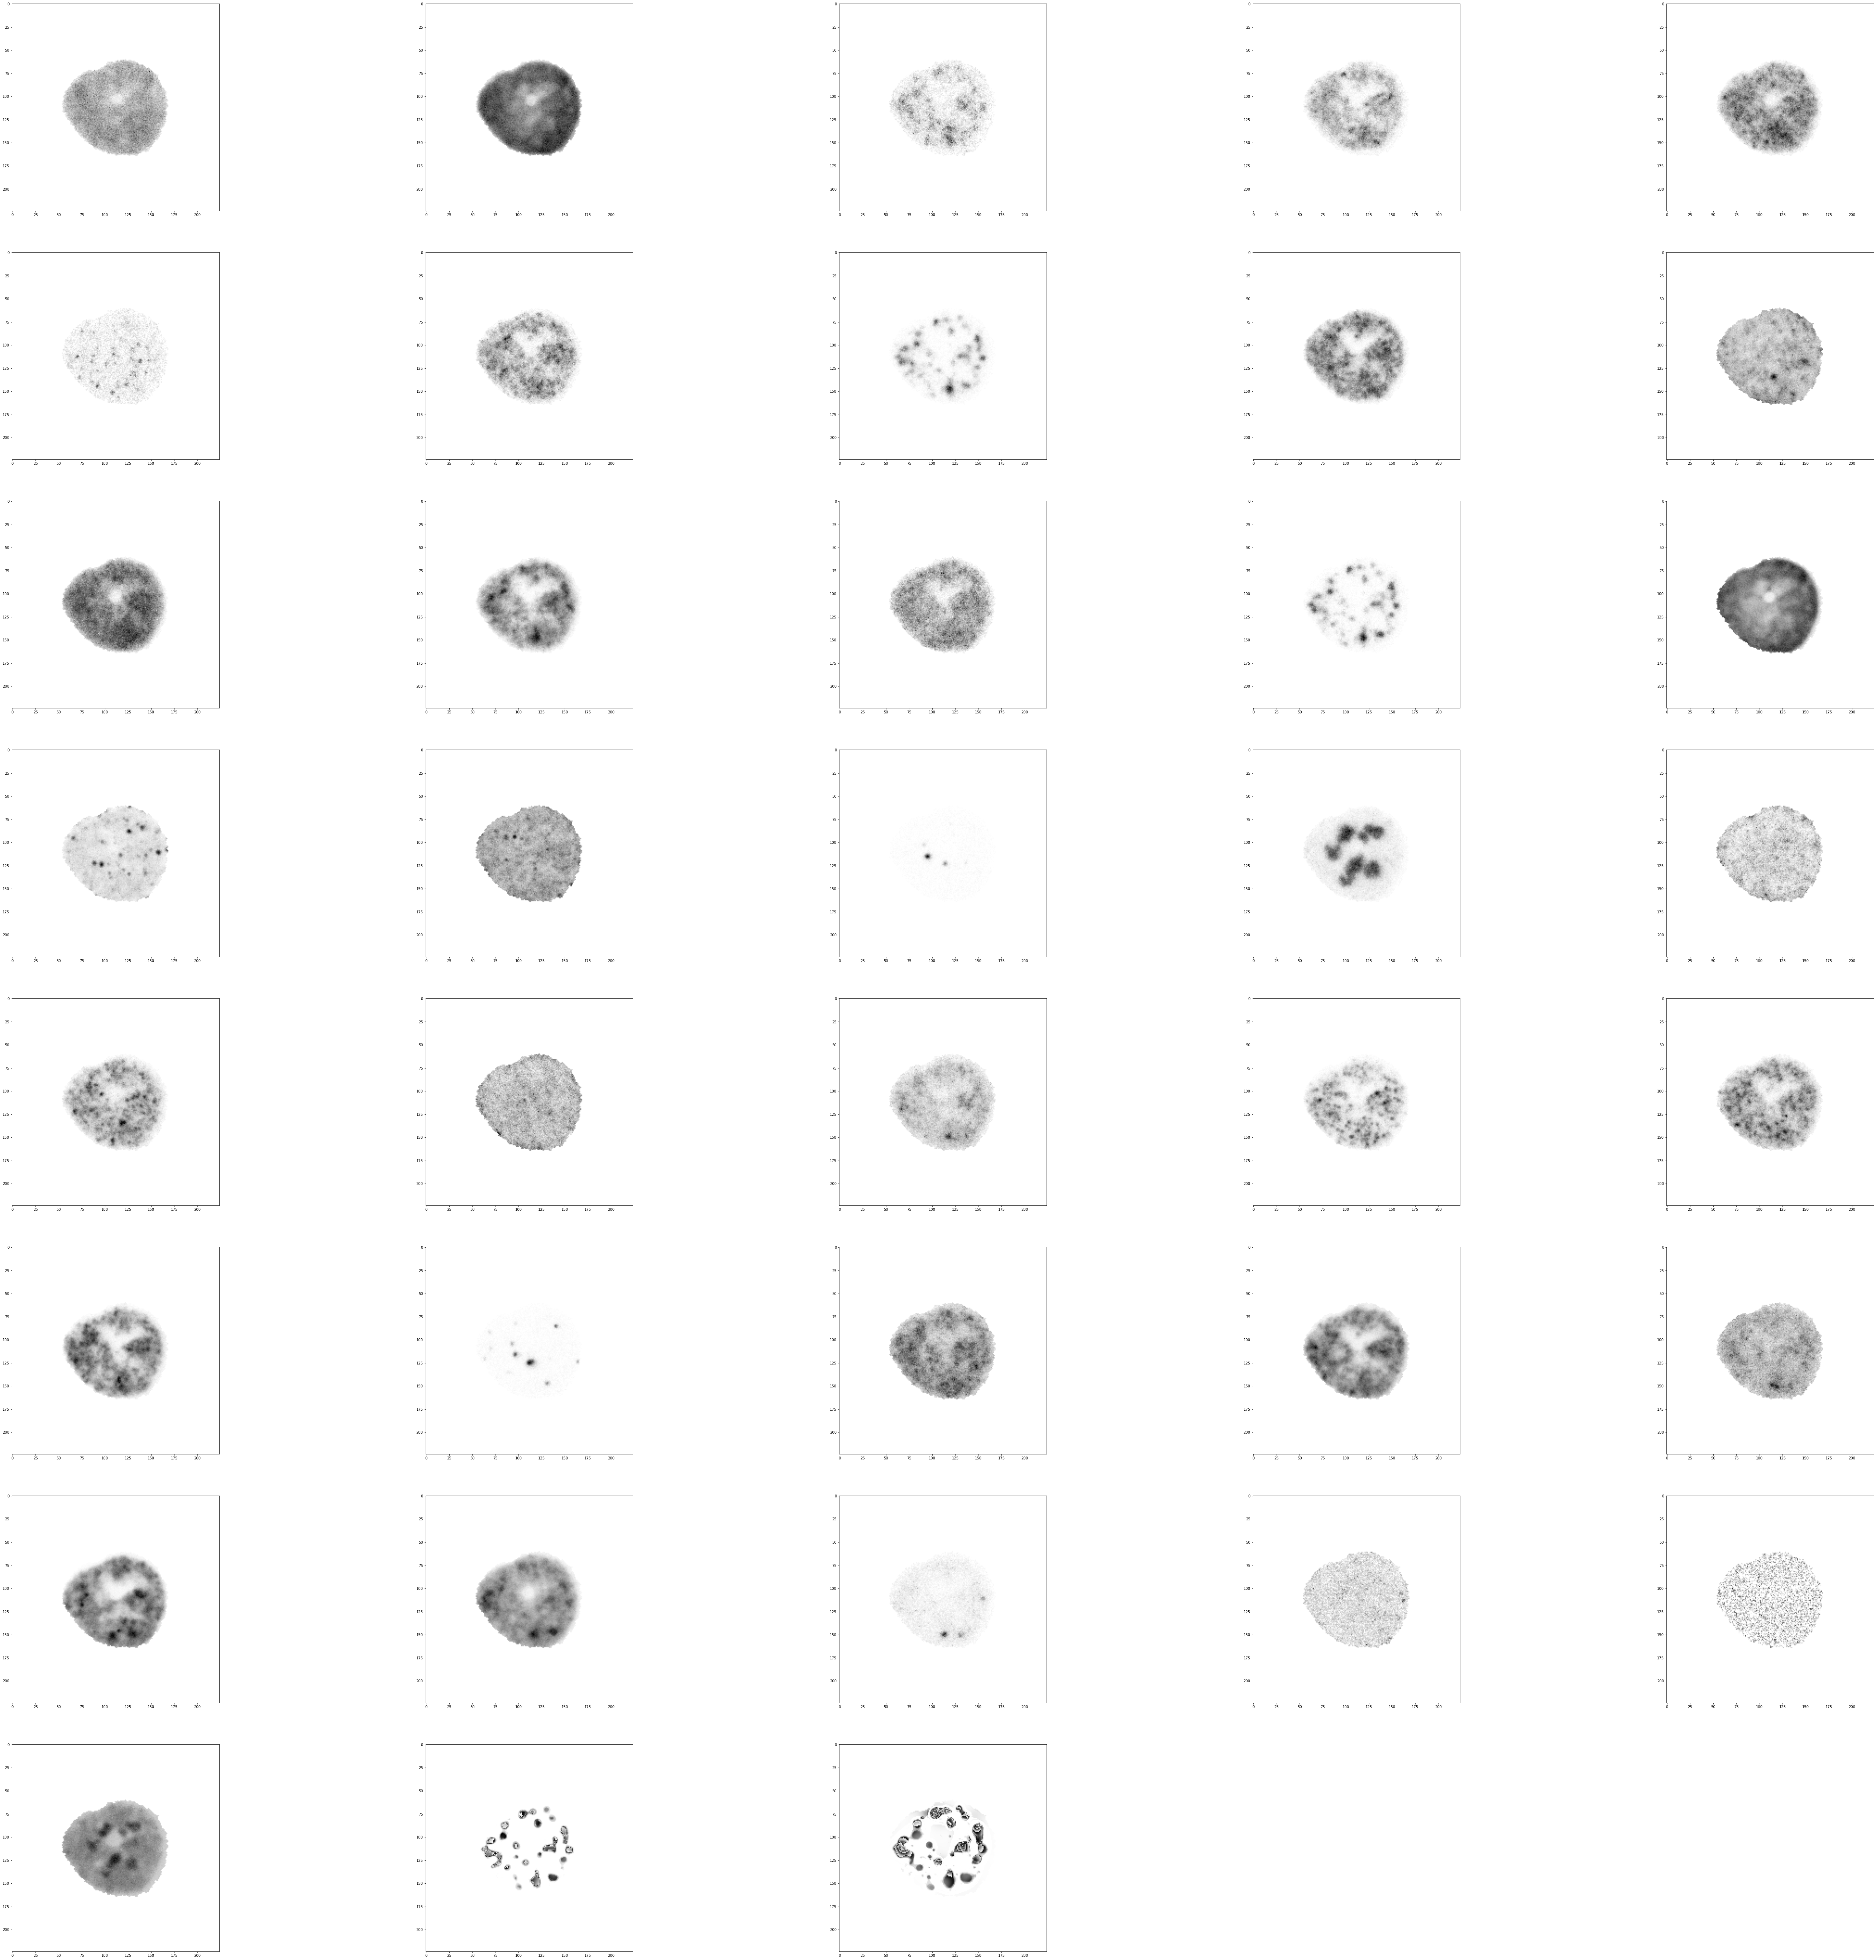

In [25]:
#train_dataset[0,:,:,:]

plt.figure(figsize=(100,100))
for c in range(train_dataset.shape[-1]):
    plt.subplot(8, 5, c+1)
    plt.imshow(train_dataset[0,:,:,c], cmap=plt.cm.binary)
plt.show